# <a href="https://thetahat.ru/">BioMed@DataScience</a>
## Семинар 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

In [57]:
# Bot check

# HW_ID: bmds_sem4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.


### Линейная регрессия

В этом ноутбуке вы познакомитесь с реализацией модели линейной регрессии в библиотеке `scikit-learn`, научитесь пользоваться ее методами и работать с данными. Линейная регрессия является одним из методов предсказания вещественного признака (таргета).

In [58]:
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

sns.set_theme(font_scale=1.3)

### Задача 1

**1.** **Загрузка данных ⏬**

В этом практическом ноутбуке вы поработаете с моделью линейной регрессии на датасете `load_diabetes` из `scikit-learn`. Набор содержит реальные клинико-лабораторные данные пациентов с целью предсказать прогрессирование диабета через год после базового обследования. Данные стандартизированы (все кроме таргета), поэтому удобно сравнивать и тестировать регрессионные методы. Классическим референсом для этого датасета считается [работа Брэдли Эфрона (Bradley Efron) и коллег (2004)](https://projecteuclid.org/journals/annals-of-statistics/volume-32/issue-2/Least-angle-regression/10.1214/009053604000000067.full?utm_source=chatgpt.com), где он применялся для сравнения алгоритмов отбора признаков.

Используемые базовые признаки:

* возраст (age);
* пол (sex);
* индекс массы тела (BMI);
* среднее артериальное давление (BP);
* шесть биохимических показателей крови (s1–s6).


In [59]:
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Функция `sklearn.datasets.load_diabetes()` возвращает словарь.

* В поле `data` хранится матрица **признаков** (данные заранее центрированы и нормированы).
* В поле `target` — числовой **таргет**: мера прогрессирования заболевания в течение года.
* В поле `DESCR` — текстовое описание датасета с подробностями.


Посмотрим на описание датасета.

In [60]:
print(data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Посмотрите на размерность матрицы признаков без таргета. Они содержатся в соответствующей колонке `data`. Размерность можно посмотреть с помощью метода `.shape`.

In [61]:
shape = data.data.shape
print("Размерность матрицы признаков без таргета:", shape)

print("Количество строк матрицы, информация о количестве пациентов:", shape[0])
print("Количество признаков матрицы (столбцов):", shape[1])

Размерность матрицы признаков без таргета: (442, 10)
Количество строк матрицы, информация о количестве пациентов: 442
Количество признаков матрицы (столбцов): 10


 В `shape[0]` содержится количество строк матрицы, информация о количестве пациентов, а в `shape[1]` количеcтво признаков матрицы (столбцов), описанных выше.

Так же посмотрите на размерность таргета

In [62]:
print("Размерность таргета:", data.target.shape)

Размерность таргета: (442,)


#### Введенные обозначения

>Данные и их размерности:
>
>* $X\in\mathbb{R}^{n\times d}$ — матрица признаков ($n$ объектов, $d$ признаков).
>  Если используете свободный член (intercept), обычно добавляют первый столбец из единиц и тогда фактическое число столбцов $= d{+}1$.`
>* $\theta\in\mathbb{R}^{d\times 1}$ — вектор параметров. Если учитывается свободный коэффициент, то размерность равна $d + 1$.
>* $y\in\mathbb{R}^{n\times 1}$ — таргет (отклики).
>* $\widehat y\in\mathbb{R}^{n\times 1}$ — предсказания.
>
>Будем предполагать линейную зависимость
>
>  $$  y = X\theta + \varepsilon,  $$
> где $\varepsilon \sim ~\mathcal{N}(0,\sigma^2)$ &mdash; шум (то, что модель не объясняет признаками)

Создайте матрицу признаков $X$ (data) и столбец наблюдений $y$ (целевая переменная).

In [63]:
X, y = data.data, data.target

**2.** **Обучение моделей 🤖**

Разбейте данные случайно на две части &mdash; обучающую и тестовую в отношении 80:20. Для этого используйте функцию [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train_shape: {X_train.shape}\nX_test_shape {X_test.shape}\ny_train_shape {y_train.shape}\ny_test_shape {y_test.shape}')

X_train_shape: (353, 10)
X_test_shape (89, 10)
y_train_shape (353,)
y_test_shape (89,)


Реализуем модель ручного предсказания методом наименьших квадратов. Для начала добавьте столбец единиц к матрице признаков на тренировочном и тестовом наборе, чтобы учесть возможный сдвиг, поскольку в датасете `diabetes` $X$ центрирован, а $y$ нет.

In [65]:
# Добавьте свободный коэффициент: слева конкатенируем столбец единиц к X (получаем X_b = [1, X]).
# Если X имеет форму (n, d), то X_b будет (n, d+1): первый столбец — константа для свободного члена.
X_train_b = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test_b = np.column_stack([np.ones(X_test.shape[0]), X_test])

Теперь реализуем обучение нашей модели

>Обучение подразумевает оценку параметра $\theta$ посредством минимизации среднеквадратичной ошибки
>
>$$
\|y - X\theta\|_2^2 = \frac{1}{n}\sum_{i=1}^n (y_i - x_i^T \theta)^2 \rightarrow \min_{\theta}.
$$
>
>На лекции было выведено, что, **если $X^T X$ обратима — т.е. у $X$ полный столбцовый ранг $d$, обычно $n\ge d$**, то оценка параметра выражается следющей (явной) формулой:
>
>$$
\widehat{\theta}
=
\underbrace{(X^{T}X)^{-1}}_{d\times d}\;
\underbrace{X^{T}}_{d\times n}\;
\underbrace{y}_{n\times 1}
\;\Rightarrow\;
\widehat{\theta}\in\mathbb{R}^{d\times 1}.
$$

In [66]:
XtX_b = X_train_b.T @ X_train_b # shape: (d, d)
XtX_b_inv = np.linalg.pinv(XtX_b) # shape: (d, d)
theta_manual_with_intercept = XtX_b_inv @ X_train_b.T @ y_train  # shape: (d+1,)

И наконец выполните предсказания на тренировочной и тестовой выборках

>Для обучающей выборки:
>
>$$
\widehat y
=
\underbrace{X}_{n\times d}\;
\underbrace{\widehat{\theta}}_{d\times 1}
\;\Rightarrow\;
\widehat{y}\in\mathbb{R}^{n\times 1}.
$$
>
>Для новых данных $X_{\text{new}}\in\mathbb{R}^{m\times d}$:
>
>$$
\widehat y_{\text{new}}
=
\underbrace{X_{\text{new}}}_{m\times d}\;
\underbrace{\widehat{\theta}}_{d\times 1}\in\mathbb{R}^{m\times 1}.
$$

In [67]:
y_pred_manual_train = X_train_b @ theta_manual_with_intercept # shape(n, )
y_pred_manual_test  = X_test_b @ theta_manual_with_intercept # shape(n, )

Теперь инициализируем модель линейной регрессии [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), указав значение параметра `fit_intercept=True`. Алгебраически это то же самое, как мы добаляли столбец из единиц, чтобы учесть возможный сдвиг.

>В реализации из `sklearn` intercept получают **без** явного столбца единиц: сначала центрируют данные $X_c=X-\mathbf{1}\cdot\bar X^{T}$ и $y_c=y-\bar y\cdot\mathbf{1}$, затем оценивают $\hat\theta$ по МНК на $(X_c,y_c)$, а intercept восстанавливают как
>
>$$\widehat\theta_{0}=\bar y-\bar X^{T}\widehat\theta,$$
>
>где $\mathbf{1}\in\mathbb{R}^{n}$ — вектор из единиц. Это эквивалентно модели со свободным параметром $\widehat y=\theta_{0}\cdot\mathbf{1}+X\theta$ и минимизации
>
>$$\|y-\theta_{0}\cdot\mathbf{1}-X\theta\|_{2}^{2}\ \to\ \min_{\theta_{0},\,\theta}.$$


In [68]:
sk_model = LinearRegression(fit_intercept=True)

Обучите ее, вызвав соответсвующий метод `.fit()`. Он также минимизирует среднеквадратичную ошибку, при выполненных условиях, указанных в методе обучения МНК, формулы оценок можно сказать, что совпадают полностью.

На практике есть отличия, связанные с оптимизацией вычислений. О них можно почитать в документации `sklearn`.

In [69]:
sk_model.fit(X_train, y_train)

LinearRegression()

И сделаем предсказание для тренировочной и тестовой выборок (используя тестовую и тренировочную матрицу признаков)

In [70]:
y_pred_sk_train = sk_model.predict(X_train)
y_pred_sk_test  = sk_model.predict(X_test)

Так же посмотрите на коэффициенты, посчитанные для каждого признака. В ручной модели мы считали их явно, в модели `LinearRegression` их можно получить с помощью атрибутов `.coef_` и `.intercept_`. Второй возвращает свободный коэффициент модели.

In [71]:
theta_sklearn_with_intercept = np.r_[sk_model.intercept_, sk_model.coef_]

In [72]:
coef_df = pd.DataFrame({
    "feature": ["intercept"] + data['feature_names'],
    "manual_theta_with_intercept": theta_manual_with_intercept,
    "sklearn_theta_with_intercept": theta_sklearn_with_intercept,
    "abs_diff": np.abs(theta_sklearn_with_intercept - theta_manual_with_intercept),
})

coef_df

feature  manual_theta_with_intercept  sklearn_theta_with_intercept  \
0   intercept                   151.345605                    151.345605   
1         age                    37.904021                     37.904021   
2         sex                  -241.964362                   -241.964362   
3         bmi                   542.428759                    542.428759   
4          bp                   347.703844                    347.703844   
5          s1                  -931.488846                   -931.488846   
6          s2                   518.062277                    518.062277   
7          s3                   163.419983                    163.419983   
8          s4                   275.317902                    275.317902   
9          s5                   736.198859                    736.198859   
10         s6                    48.670657                     48.670657   

        abs_diff  
0   5.968559e-13  
1   9.166001e-13  
2   2.927436e-12  
3   2.387424e-12  
4   6.821210e-13  
5   9.163159e-11  
6   7.173639e-11  
7   4.240519e-11  
8   1.682565e-11  
9   3.740297e-11  
10  1.406875e-12

❓**Вопрос:**❓  

Отличаются ли коэффициенты sklearn реализации и нашей? Если да, предположите, почему это могло произойти. Критично ли это?

**Выводы:**  

Коэффициенты sklearn реализации и нашей несколько отличаются, но это не критично. Произойти это могло из-за разных обработок матриц или разных алгоритмов.

**3.** **Оценка качества моделей 📈**

Реализуйте метрики $MSE$, $MAE$, $MAPE$ и $R^2$ без использования `sklearn` и других готовых реализаций.

Пусть $y_1, ..., y_n$ &mdash; истинные значения, а $\widehat{y}_1, ..., \widehat{y}_n$ &mdash; предсказания.

+ $MSE = \frac{1}{n}\sum_{i=1}^n \left(y_i - \widehat{y}_i\right)^2$

+ $MAE = \frac{1}{n}\sum_{i=1}^n \left|y_i - \widehat{y}_i\right|$

* $MAPE = \frac{100\%}{n}\sum_{i=1}^n \left|\frac{y_i - \widehat{y}_{i}}{y_i}\right|$

+ $
R^2
\;=\;
1 - \frac{\displaystyle \sum_{i=1}^n (y_i - \hat{y}_i)^2}
{\displaystyle \sum_{i=1}^n (y_i - \bar y)^2},
\qquad
\bar y=\frac{1}{n}\sum_{i=1}^n y_i.
$

Где:

* числитель — сумма квадратов ошибок (**SSE**),
* знаменатель — общая вариация относительно среднего (**SST**).

❗️*Запрещается пользоваться циклами. Используйте возможности библиотеки `numpy`*❗️

In [73]:
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Mean Squared Error (MSE).

    Параметры
    ----------
    y_true : np.ndarray of shape (n,)
        Истинные значения таргета.
    y_pred : np.ndarray of shape (n,)
        Предсказанные значения.

    Возвращает
    ----------
    float
        Среднеквадратичная ошибка: (1/n) * sum((y_true - y_pred)^2).
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    return float(np.mean((y_true - y_pred)**2))


def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Mean Absolute Error (MAE).

    Параметры
    ----------
    y_true : np.ndarray of shape (n,)
        Истинные значения таргета.
    y_pred : np.ndarray of shape (n,)
        Предсказанные значения.

    Возвращает
    ----------
    float
        Средняя абсолютная ошибка: (1/n) * sum(|y_true - y_pred|).
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    return float(np.mean(np.abs(y_true - y_pred)))


def mape(y_true: np.ndarray, y_pred: np.ndarray, *, percent: bool = False) -> float:
    """
    Mean Absolute Percentage Error (MAPE).

    По умолчанию возвращает долю (как в `sklearn.metrics.mean_absolute_percentage_error`).
    Если `percent=True`, умножает результат на 100.

    Параметры
    ----------
    y_true : np.ndarray of shape (n,)
        Истинные значения таргета.
    y_pred : np.ndarray of shape (n,)
        Предсказанные значения.
    percent : bool, default=False
        Возвращать результат в процентах.

    Возвращает
    ----------
    float
        MAPE в долях (или в процентах при `percent=True`).
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    return float(mape * 100.0) if percent else float(mape)


def r2(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Коэффициент детерминации R^2 для моделей с интерсептом.

    Параметры
    ----------
    y_true : np.ndarray of shape (n,)
        Истинные значения таргета.
    y_pred : np.ndarray of shape (n,)
        Предсказанные значения.

    Возвращает
    ----------
    float
        R^2 = 1 - SSE/SST, где SST = sum((y_true - mean(y_true))^2).
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    sse = np.sum((y_true - y_pred)**2)
    sst = np.sum((y_true - np.mean(y_true))**2)
    return float(1 - sse/sst)


In [74]:
# Проверка реализаций на искусственных данных

rng = np.random.default_rng(0)
y_true = rng.normal(size=500)
y_pred = y_true + rng.normal(scale=0.5, size=500)

assert np.allclose(mse(y_true, y_pred), mean_squared_error(y_true, y_pred), rtol=1e-12, atol=1e-12)
assert np.allclose(mae(y_true, y_pred), mean_absolute_error(y_true, y_pred), rtol=1e-12, atol=1e-12)
assert np.allclose(mape(y_true, y_pred), mean_absolute_percentage_error(y_true, y_pred), rtol=1e-12, atol=1e-12)
assert np.allclose(r2(y_true, y_pred), r2_score(y_true, y_pred), rtol=1e-12, atol=1e-12)

 Реализуйте предсказание средним, то есть наивную модель, которая всегда будет предсказывать среднее значение $y$. Такие наивные модели обычно называют baseline, они очень удобны для последующих сравнений качества моделей.

In [75]:
y_mean_train = np.full_like(y_train, fill_value=np.mean(y_train), dtype=float)
y_mean_test  = np.full_like(y_test,  fill_value=np.mean(y_train), dtype=float)

Посчитайте
[$MSE$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html),
[$MAE$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html),
[$MAPE$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html),
[$R^2$](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
на **тестовой выборке** для предсказаний модели `skearn`, выведите с точностью до трех знаков после запятой, и сравните с библиотечными результатами, полученными ранее

In [76]:
def metrics_df(
    y_true_train, y_pred_train,
    y_true_test,  y_pred_test,
    *, mape_percent: bool = False, round_to: int | None = 3
) -> pd.DataFrame:
    """
    Возвращает таблицу метрик для train/test: MSE, MAE, MAPE, R2.

    mape_percent=True  -> MAPE в процентах (x100), иначе в долях.
    round_to=None      -> не округлять.
    """
    df = pd.DataFrame(
        {
            "MSE":  [mse(y_true_train, y_pred_train), mse(y_true_test, y_pred_test)],
            "MAE":  [mae(y_true_train, y_pred_train), mae(y_true_test, y_pred_test)],
            "MAPE": [mape(y_true_train, y_pred_train, percent=mape_percent), 
                    mape(y_true_test, y_pred_test, percent=mape_percent)],
            "R2":   [r2(y_true_train, y_pred_train),  r2(y_true_test, y_pred_test)],
        },
        index=["train", "test"],
    )
    return df.round(round_to) if round_to is not None else df

Сначала выведем качество ручной реализации МНК

In [77]:
tbl = metrics_df(y_train, y_pred_manual_train, y_test, y_pred_manual_test)
tbl

MSE     MAE   MAPE     R2
train  2868.550  43.484  0.389  0.528
test   2900.194  42.794  0.375  0.453

Теперь модели из sklearn

In [78]:
tbl = metrics_df(y_train, y_pred_sk_train, y_test, y_pred_sk_test)
tbl

MSE     MAE   MAPE     R2
train  2868.550  43.484  0.389  0.528
test   2900.194  42.794  0.375  0.453

И, наконец, модели, которая предсказывала средним

In [79]:
tbl = metrics_df(y_train, y_mean_train, y_test, y_mean_test)
tbl

MSE     MAE   MAPE     R2
train  6076.398  66.448  0.629  0.000
test   5361.533  64.006  0.628 -0.012

Объясните полученные результаты. Какие модели стоит использовать дальше и почему?

**Вывод:**  

Значения ручной реализации МНК и модели из sklearn идентичны, значения модели, которая предсказывала средним, отличаются от первых двух. 
Первые две идентичны, т.к. обе решают МНК. В модели, предсказывающей среднее, R2 у train равно 0, т.к. модель не обучается, а предсказывает, у test около 0 (отрицательная) из-за флуктуаций.
Стоит использовать ручную реализацию МНК или модели из sklearn, т.к. они дают более точные результаты.

**4.** **Интерпретация результатов ✍**

Линейные модели удобны для интерпретации: по коэффициентам можно судить, как меняется таргет при изменении конкретного признака на единицу (при прочих неизменных признаках). Это делает поведение предсказаний прозрачным.

**Про масштаб признаков.** На практике признаки обычно стандартизируют, то есть вычитают среднее и делят на стандартное отклонение:
$$
    \widetilde{x}_{ij} = \frac{x_{ij} - np.mean(x_{j})}{np.var(x_{j})}.
$$
Это даёт возможность корректно **сравнивать вклад разных признаков по величине коэффициентов**.

Однако, данный шаг можно опустить, если ваша задача подразумевает оценку именно **размерных** коэффициентов (с физическим смыслом и единицами измерения). Но в таком случае их **некорректно сравнивать между собой “в лоб”**  —  масштабы и размерности могут отличаться.

Наши данные изначально стандартизированы.


Запишите в переменную `feature` массив из названий признаков, а в `sk_coef` коэффициенты обученной sklearn модели соответсвенно и посмотрите на графиках, как соотносятся получившиеся значения коэффициентов для разных признаков.  

<details>
  <summary>Подсказка</summary>

  Значения уже есть в датафрейме выше `coef_df`

</details>


In [80]:
features = data.feature_names
sk_vals = sk_model.coef_
x = np.arange(len(features)) # индексы признаков
width = 0.4

Визуализируем полученные коэффициенты

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


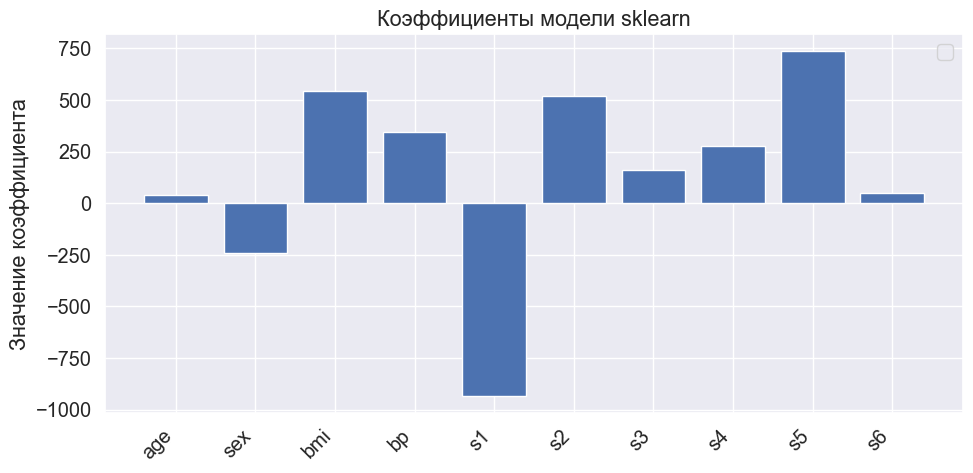

In [81]:
plt.figure(figsize=(10, 5))
plt.bar(features, sk_vals)
plt.xticks(x, features, rotation=45, ha="right")
plt.ylabel("Значение коэффициента")
plt.title("Коэффициенты модели sklearn")
plt.legend()
plt.tight_layout()
plt.show()

Проинтерпретируйте полученные коэффициенты.  Почему одни больше других? Почему одни отрицательные, другие нет? Предположите причины различной абсолютной разницы у разных коэфициентов. Критично ли это?

Ниже напомним информацию о данных.

In [82]:
print(data["DESCR"].split("baseline\n\n")[-1].split("\n\nNote")[0])

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level


**Вывод:**  

1) Одни больше других, т.к. по-разному влияют на риск диабета: те, что больше, сильно увеличивают риски, те, что меньше, уже меньше влияют.
2) Отрицательные коэффициенты снижают риски диабета, к ним относятся такие параметры как пол и уровень холестерина в крови
3) Причины разницы: самое высокое значение коэффициента по модулю у параметра s1 - высокий уровень холестерина (= сахара) собственно приводит к диабету, далее параметр s5 - высокий уровень триглицеридов также повышает риск сердечно-сосудистых заболеваний, т.к. дает большую нагрузку на поджелудочную железу, bmi - чем больше индекс массы тела, тем больше вес и клетки хуже чувствуют и обрабатывают инсулин, что приводит к диабету, s2 - тоже холестерин, bp - повреждение сосудов (?) и т.д

**5.** **Самое вкусное напоследок 🍒 (Gradient Descent)**

##### 1) Формулы GD

* Шаг градиентного спуска:

$$
\theta_{t+1}=\theta_t-\eta\,\nabla f(\theta_t),
$$

где $f(\theta)$ — оптимизируемая функция (loss), $\eta>0$ — шаг обучения (learning rate).

##### 2) Линии уровня (contours)

* «Линии уровня» — множества точек, где $f(\theta)=\text{const}$.
  Для квадратичных функций это эллипсы. GD двигается **перпендикулярно** к этим линиям (в сторону антиградиента), часто «зигзагами» при вытянутых эллипсах.

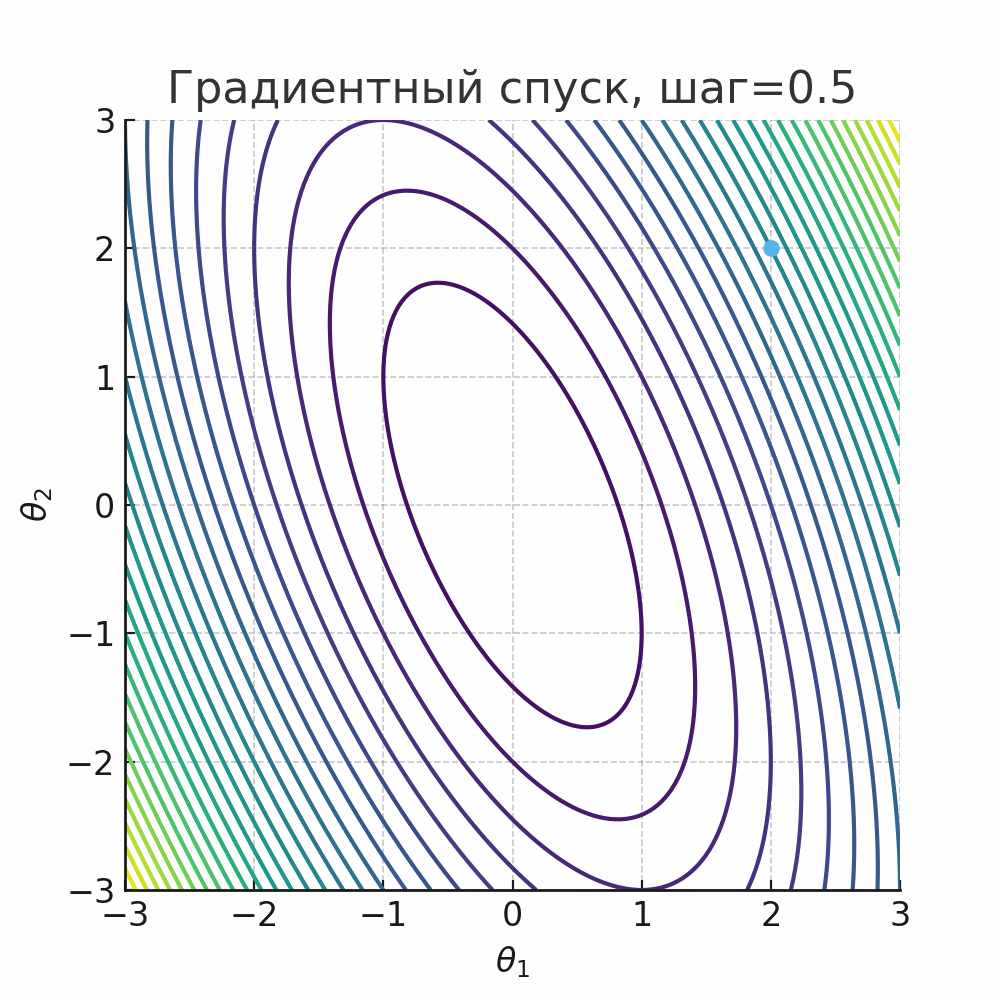

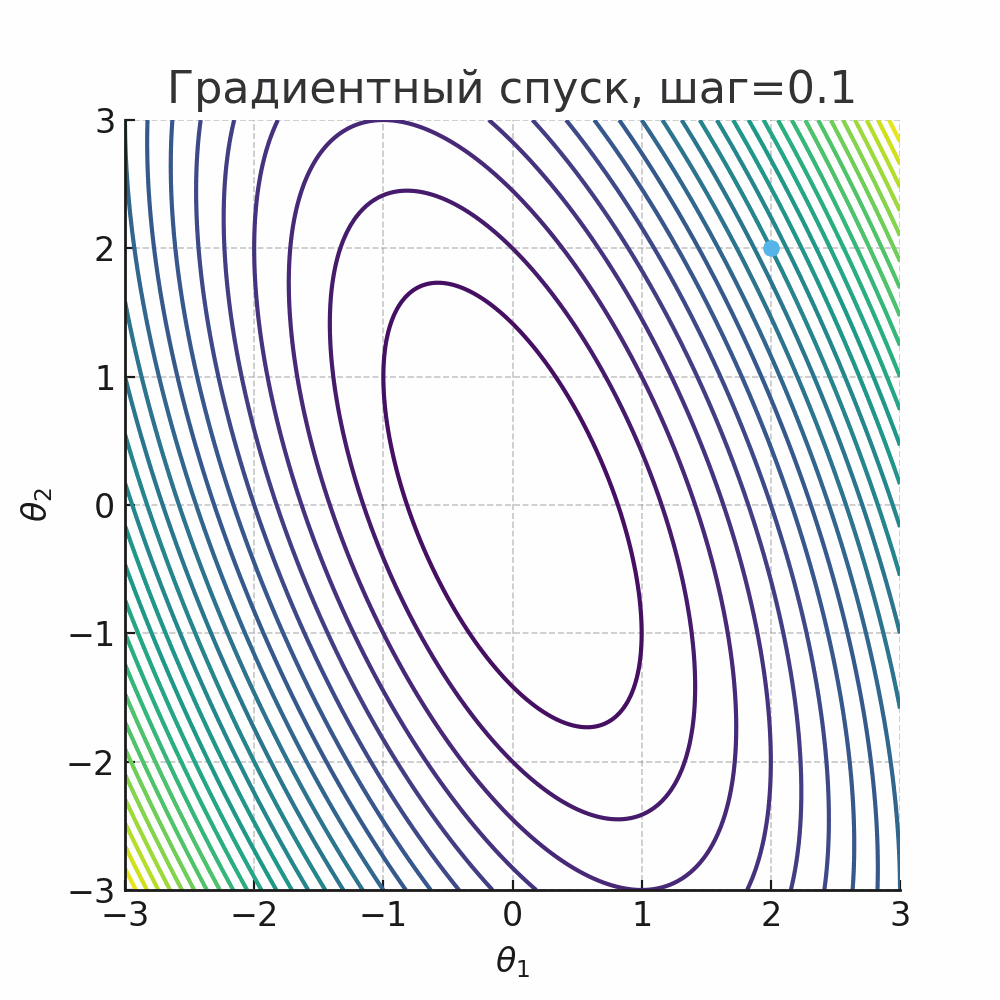

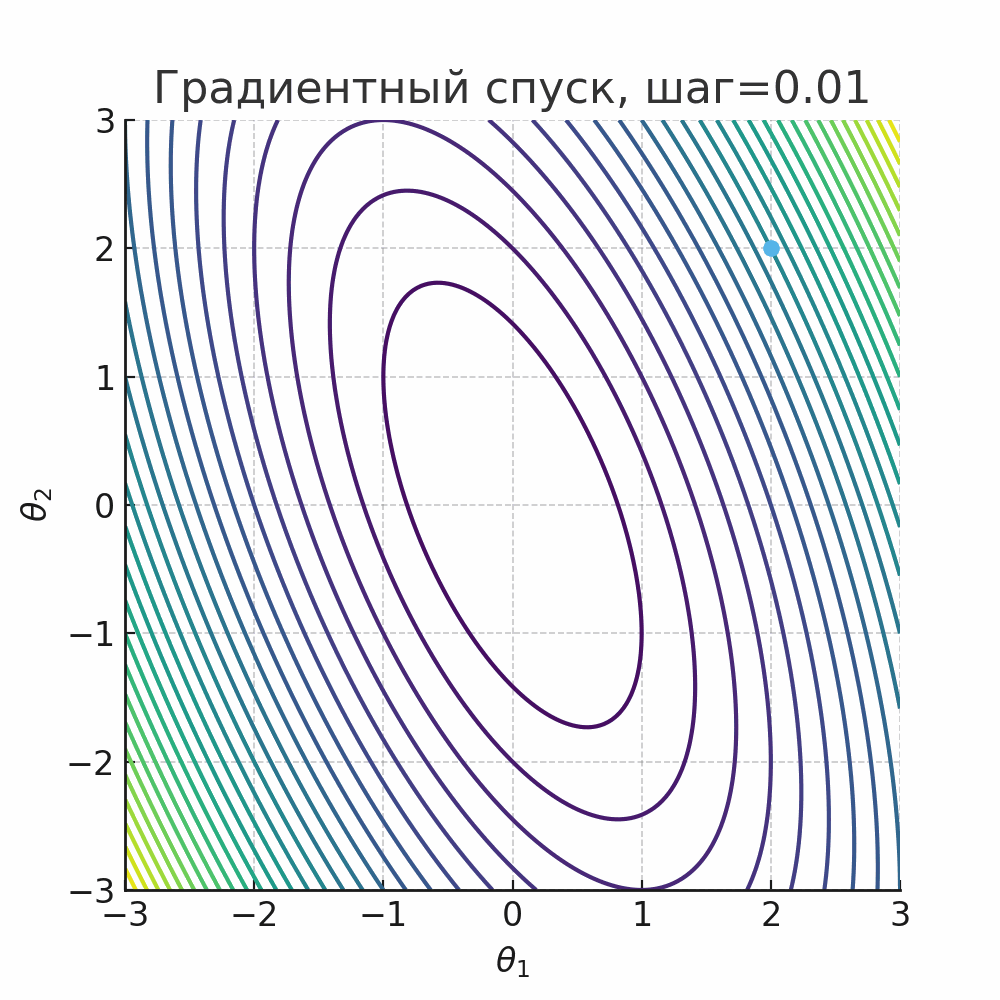

**Как это выглядит на самом деле?**

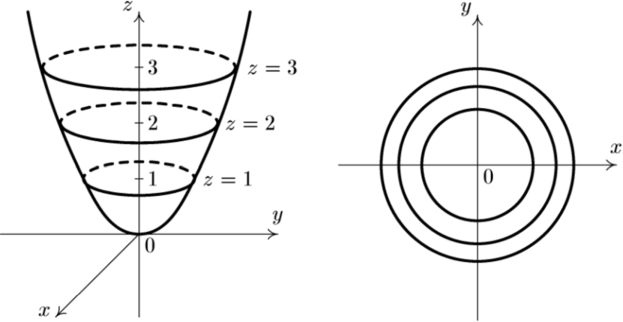

Картинка иллюстрирует связь «чаши» функции и её линий уровня — ровно то, что мы использовали в гифках с градиентным спуском.

* Слева — 3D-поверхность квадратичной функции, например $f(x,y)=x^2+y^2$. Горизонтальные «срезы» при фиксированных $z=c$ (пунктирные окружности) показывают уровни $f(x,y)=c$. Минимум в точке $(0,0)$.

* Справа — вид сверху: те же срезы проецируются на плоскость $xy$ как **линии уровня** (contours). Для изотропной чаши это концентрические окружности; для «вытянутой» чаши были бы эллипсы — как на наших гифках.

* **Градиент** $\nabla f(x,y)$ ортогонален линиям уровня и указывает направление **наискорейшего роста**; шаг GD идёт по **антиградиенту** к центру окружностей.

❓**Вопросы:**❓

Сделайте выводы по анимациям. Вот несколько наводящих вопросов:

* Как $\eta$ влияет на скорость сходимости? Чем грозит слишком большое или слишком маленькое значение?
* При каком $\eta$ траектория выглядит оптимальной?
* Что меняется, если эллипсы сильно вытянуты (и как это связано с масштабом признаков)?

**Вывод:**  

1) Значение $\eta$ влияет на время и плавность сходимости. Слишком большое значение $\eta$ грозит нестабильностью и резкими скачками (поэтому можно неудачно прийти в центр), слишком маленькое значение $\eta$ грозит огромным временем сходимости.
2) Траектория в нашем случаем выглядит оптимальной при $\eta = 0.1$
3) Если эллипсы сильно вытянуты, то траектория будет не плавной, а зигзагообразной, менее быстро и четко придет к центру. Если бы были менее вытянутые эллипсы, скорость сходимости бы возросла.

---
© 2025 команда <a href="https://thetahat.ru/">ThetaHat</a> для BioMed@DataScience